In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

import linear as lg

In [13]:
def Hub(z,omh2,h2):
    return 100*np.sqrt(omh2*pow(1+z,3)+h2-omh2)


def Hub_wcd(z,omh2,h2,w):
    return 100*np.sqrt( omh2*pow(1+z,3)+(h2-omh2)*pow(1+z,3*(1+w))  )      


def Hub_cur(z,omh2,okh2,h2):
    return 100*np.sqrt(  omh2*pow(1+z,3) + okh2*pow(1+z,2) + h2-omh2-okh2  )



def Hub_sqr(z,omh2,h2):
    return pow(10,4)*(omh2*pow(1+z,3)+h2-omh2)


def Hub_wcd_sqr(z,omh2,h2,w):
    return pow(10,4)*( omh2*pow(1+z,3)+(h2-omh2)*pow(1+z,3*(1+w))  )      


def Hub_cur(z,omh2,okh2,h2):
    return pow(10,4)*(  omh2*pow(1+z,3) + okh2*pow(1+z,2) + h2-omh2-okh2  )


def xi2(H_th,H_obs,dH_obs):
    x = (H_th-H_obs)/dH_obs
    return np.dot(x,x)


In [17]:
from pathlib import Path
import os
cwd=os.getcwd()

path_lcp = cwd + '/hubel.dat'
lcp_file = Path(path_lcp)


if lcp_file.is_file():

    lcp = np.genfromtxt(path_lcp)
                
    z_obs = lcp[:,0]
    H_obs = lcp[:,1]
    dH_obs = lcp[:,2] 

    print("H data are loaded")   
    
else:
    print("H files do not exist")
    sys.exit(0) 

H_obs = H_obs/100
dH_obs = dH_obs/100

H_obs_sqr = H_obs**2
dH_sqr = 2*H_obs*dH_obs

H data are loaded


Multiprocess sampling (2 chains in 2 jobs)
HamiltonianMC: [h2, Omh2]


Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 13 seconds.
/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Omh2  0.123  0.005   0.113    0.133        0.0      0.0    6347.0  6337.0   
h2    0.518  0.015   0.491    0.546        0.0      0.0    6307.0  6307.0   

      ess_bulk  ess_tail  r_hat  
Omh2    6352.0    8292.0    1.0  
h2      6302.0    9002.0    1.0  


array([[<AxesSubplot:title={'center':'Omh2'}>,
        <AxesSubplot:title={'center':'Omh2'}>],
       [<AxesSubplot:title={'center':'h2'}>,
        <AxesSubplot:title={'center':'h2'}>]], dtype=object)

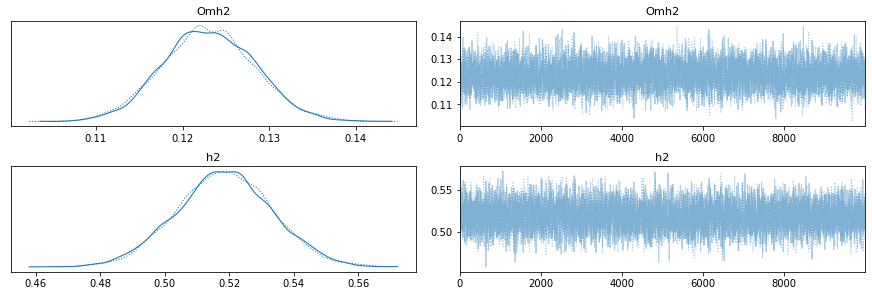

In [6]:
#LCDM
def log_like1(t1,t2):
    H_th = Hub(z_obs,t1,t2)
    x = ( H_th - H_obs)/dH_obs
    return -0.5*pm.math.dot(x,x) 

with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    t1 = pm.Normal('Omh2', mu=0.13, sigma=0.05)
    t2 = pm.Normal('h2', mu=0.45, sigma=0.1)
    #t3 = pm.Normal('w', mu=-1, sigma=0.3)

    #om = pm.Uniform('Omega_m', lower=0.1, upper=0.5)
    
    like = pm.Potential('like', log_like1(t1,t2))

    #step = pm.Metropolis()
    #step= None
    step = pm.hmc.HamiltonianMC()
    # Inference!
    trace = pm.sample(10000,tune=2000, cores=2,chains=2,step=step) 


print(pm.summary(trace))
pm.traceplot(trace)

Multiprocess sampling (2 chains in 2 jobs)
HamiltonianMC: [w, h2, Omh2]


Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 27 seconds.
The acceptance probability does not match the target. It is 0.7696582801469439, but should be close to 0.65. Try to increase the number of tuning steps.
/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Omh2  0.130  0.008   0.116    0.144      0.000    0.000    6857.0  6857.0   
h2    0.533  0.019   0.497    0.569      0.000    0.000    9905.0  9905.0   
w    -1.104  0.082  -1.257   -0.950      0.001    0.001    5776.0  5776.0   

      ess_bulk  ess_tail  r_hat  
Omh2    6874.0    8253.0    1.0  
h2      9907.0   11132.0    1.0  
w       5740.0    7816.0    1.0  


array([[<AxesSubplot:title={'center':'Omh2'}>,
        <AxesSubplot:title={'center':'Omh2'}>],
       [<AxesSubplot:title={'center':'h2'}>,
        <AxesSubplot:title={'center':'h2'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'w'}>]], dtype=object)

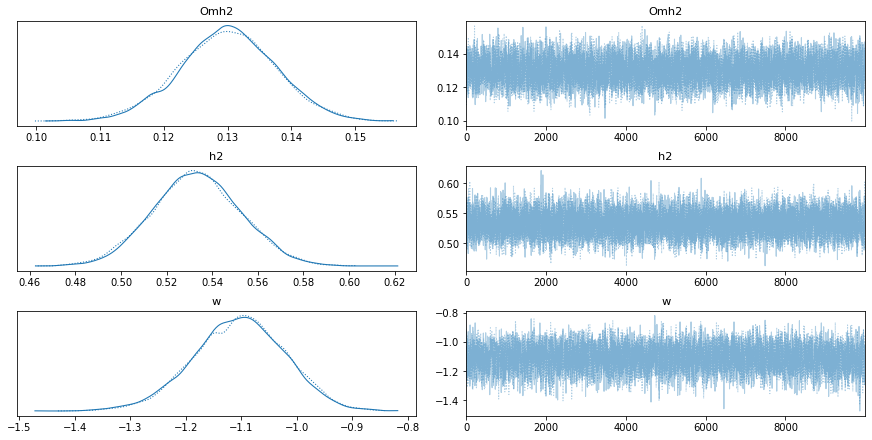

In [16]:
H_obs = 100*H_obs
dH_obs = 100*dH_obs

# this is for wcdm
def log_like2(t1,t2,t3):
    H_th = Hub_wcd(z_obs,t1,t2,t3)
    x = ( H_th - H_obs)/dH_obs
    return -0.5*pm.math.dot(x,x) 

with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    t1 = pm.Normal('Omh2', mu=0.13, sigma=0.05)
    t2 = pm.Normal('h2', mu=0.45, sigma=0.1)
    t3 = pm.Normal('w', mu=-1, sigma=0.3)

    #om = pm.Uniform('Omega_m', lower=0.1, upper=0.5)
    
    like = pm.Potential('like', log_like2(t1,t2,t3))

    #step = pm.Metropolis()
    #step= None
    step = pm.hmc.HamiltonianMC()
    # Inference!
    trace = pm.sample(10000,tune=2000, cores=2,chains=2,step=step) 


print(pm.summary(trace))
pm.traceplot(trace)

Multiprocess sampling (2 chains in 2 jobs)
HamiltonianMC: [h2, Okh2, Omh2]


Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 22 seconds.
The acceptance probability does not match the target. It is 0.8072987678476015, but should be close to 0.65. Try to increase the number of tuning steps.
/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
Omh2  0.135  0.016   0.106    0.165      0.000      0.0    7250.0   7250.0   
Okh2 -0.034  0.044  -0.116    0.047      0.001      0.0    6689.0   6689.0   
h2    0.526  0.018   0.494    0.560      0.000      0.0   12130.0  12112.0   

      ess_bulk  ess_tail  r_hat  
Omh2    7252.0    9767.0    1.0  
Okh2    6699.0    9789.0    1.0  
h2     12155.0   10506.0    1.0  


/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'Omh2'}>,
        <AxesSubplot:title={'center':'Omh2'}>],
       [<AxesSubplot:title={'center':'Okh2'}>,
        <AxesSubplot:title={'center':'Okh2'}>],
       [<AxesSubplot:title={'center':'h2'}>,
        <AxesSubplot:title={'center':'h2'}>]], dtype=object)

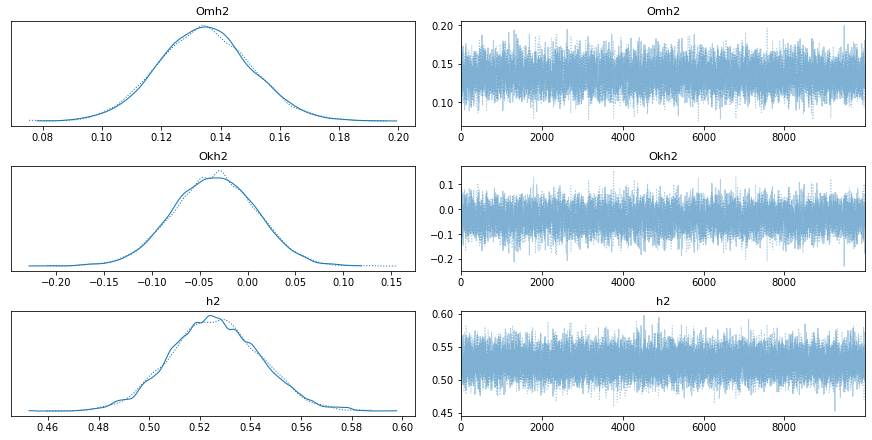

In [8]:
# this is for kcdm
def log_like3(t1,t2,t3):
    H_th = Hub_cur(z_obs,t1,t2,t3)
    x = ( H_th - H_obs)/dH_obs
    return -0.5*pm.math.dot(x,x) 


with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    t1 = pm.Normal('Omh2', mu=0.13, sigma=0.05)
    t2 = pm.Normal('Okh2', mu=0.0, sigma=0.1)
    t3 = pm.Normal('h2', mu=0.45, sigma=0.1)

    #om = pm.Uniform('Omega_m', lower=0.1, upper=0.5)
    
    like = pm.Potential('like', log_like3(t1,t2,t3))

    #step = pm.Metropolis()
    #step= None
    step = pm.hmc.HamiltonianMC()
    # Inference!
    trace = pm.sample(10000,tune=2000, cores=2,chains=2,step=step) 

print(pm.summary(trace))
pm.traceplot(trace)

In [18]:
f1 = lambda z: pow(1+z,3) - 1 
f2 = lambda z: 1
fun1 = [f1,f2]

g1 = lambda z: pow(1+z,3) - 1 
g2 = lambda z: 1
g3 = lambda z: pow(1+z,2) - 1

fun2 = [g1,g2,g3]

reg_lcdm = lg.linear_reg(z_obs,H_obs_sqr,dH_sqr,2,fun1)
#reg_wcdm = lg.linear_reg(z_obs,H_obs,dH_obs,2,fun2)
reg_kcdm = lg.linear_reg(z_obs,H_obs_sqr,dH_sqr,3,fun2)

#prior information on lcdm
P1 = np.zeros(shape=(2,2))
pri_mean1 = np.array([0.13,0.45])
pri_std1 = [0.05,0.1]
np.fill_diagonal(P1, [1/sd**2 for sd in pri_std1])


#prior information on okcdm
P2 = np.zeros(shape=(3,3))
pri_mean2 = np.array([0.13,0.45,0.])
pri_std2 = [0.05,0.1,0.1]
np.fill_diagonal(P2, [1/sd**2 for sd in pri_std2])

pos_lcdm,cov_lcdm = reg_lcdm.post_dist(pri_mean1,P1)
pos_kcdm,cov_kcdm = reg_kcdm.post_dist(pri_mean2,P2)

evid_lcdm = reg_lcdm.evidenc(pri_mean1,P1)
evid_kcdm = reg_kcdm.evidenc(pri_mean2,P2)

print(evid_lcdm-evid_kcdm)

t1,t2 = pos_lcdm
r1,r2 = reg_lcdm.max_likelihood()

H_th1 = Hub(z_obs,t1,t2)
H_th2 = Hub(z_obs,r1,r2)

print(xi2(H_th2,100*H_obs,100*dH_obs))

0.4308311510465046
25.045949435488012


In [19]:
print(reg_lcdm.max_likelihood())

print(np.sqrt(cov_lcdm))
print(pos_lcdm)

print(np.sqrt(cov_kcdm))
print(pos_kcdm)

[0.12131747 0.51867232]
[[0.00540397        nan]
 [       nan 0.01495888]]
[0.12169603 0.5169955 ]
[[0.01573682 0.01052623        nan]
 [0.01052623 0.01812082        nan]
 [       nan        nan 0.04410677]]
[ 0.13471114  0.52600156 -0.0388403 ]


In [15]:
w = np.linspace(-1.3,-0.8,100)

reg_lcdm = lg.linear_reg(z_obs,H_obs_sqr,dH_sqr,2,fun1)

for i in range(len(w)):
    m1 = lambda z: pow(1+z,3) - pow(1+z,3*(1+w[i])) 
    m2 = lambda z: pow(1+z,3*(1+w[i]))
    fun3 = [m1,m2]

    reg_wcdm = lg.linear_reg(z_obs,H_obs_sqr,dH_sqr,2,fun3)
    theta_lcdm = reg_lcdm.max_likelihood()
    theta_wcdm = reg_wcdm.max_likelihood()
    t1,t2 = theta_wcdm
    H_th = Hub_wcd(z_obs,t1,t2,w[i])
    xi = xi2(H_th,100*H_obs,100*dH_obs)
    print(w[i],xi)


-1.3 27.59767603876037
-1.294949494949495 27.3829172058688
-1.2898989898989899 27.172932238280502
-1.284848484848485 26.96778218272693
-1.27979797979798 26.767528050209435
-1.2747474747474747 26.572230800943753
-1.2696969696969698 26.381951329120238
-1.2646464646464648 26.196750447483335
-1.2595959595959596 26.016688871737912
-1.2545454545454546 25.841827204786778
-1.2494949494949494 25.67222592080516
-1.2444444444444445 25.50794534915928
-1.2393939393939395 25.349045658174216
-1.2343434343434343 25.19558683875803
-1.2292929292929293 25.04762868788846
-1.2242424242424244 24.905230791969807
-1.2191919191919192 24.768452510065803
-1.2141414141414142 24.63735295701679
-1.2090909090909092 24.511990986447735
-1.204040404040404 24.392425173675328
-1.198989898989899 24.278713798521252
-1.193939393939394 24.170914828039756
-1.1888888888888889 24.06908589916744
-1.183838383838384 23.97328430130363
-1.1787878787878787 23.883566958829213
-1.1737373737373737 23.799990413572537
-1.1686868686868688 

In [25]:
omh2_true = 0.147
h2_true = 0.49

z_o =np.linspace(0,2,50)

p = np.linspace(-2.35,-.955,15)
p_mid = (p[1:] + p[:-1])/2
sig = 10**p_mid

H_true = Hub(z_o,omh2_true,h2_true)
H_o = np.zeros(shape=(len(sig),50))
err = np.zeros(shape=(len(sig),50))

for i in range(len(sig)):
    eps = np.random.normal(0,sig[i],50)
    H_o[i] = H_true*( 1 + eps )
    err[i] =  H_true*sig[i]

H_o_sqr = H_o**2
err_sqr = 2*H_o* err    

In [28]:
F = np.zeros(shape=(len(z_o),2))
A = np.zeros(shape=(len(z_o),2))

for j in range(2):
    F[:,j] = [fun1[j](x) for x in z_o]
    A[:,j] = F[:,j]/err_sqr[4]

b = H_o_sqr[4]/err_sqr[4]
L = np.dot(A.T,A)

L_inv = np.linalg.inv(L)
theta_0 = L_inv@A.T@b
theta_0
        

array([1468.73926122, 4924.10462444])